In [1]:
#import data 
import pandas as pd
data = pd.read_csv(r'FinalDataSet2.csv', index_col = 0)
data.head()

,ID,Title,Artist,Year,Danceability,Energy,Key,Loud,Mode,Speechness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Time_Signature
0,"dict_keys(['2kKL5kk4On8YRSKWDgXWMX', '7DH5dXVu...",Theme from A Summer Place,Percy Faith,1960,0.466,0.389,5,-12.825,1,0.0253,0.631,0.843,0.295,0.749,92.631,144893,4
1,"dict_keys(['2kKL5kk4On8YRSKWDgXWMX', '7DH5dXVu...",He'll Have to Go,Jim Reeves,1960,0.554,0.186,1,-15.846,1,0.0379,0.909,0.00144,0.11,0.2,81.181,138640,3
2,"dict_keys(['2kKL5kk4On8YRSKWDgXWMX', '7DH5dXVu...",Cathy's Clown,The Everly Brothers,1960,0.498,0.582,7,-8.961,1,0.0339,0.412,0,0.372,0.866,119.809,144013,4
3,"dict_keys(['2kKL5kk4On8YRSKWDgXWMX', '7DH5dXVu...",Let It Be Me,The Everly Brothers,1960,0.471,0.19,7,-16.046,1,0.028,0.77,0.00385,0.129,0.305,72.764,146733,4
4,"dict_keys(['2kKL5kk4On8YRSKWDgXWMX', '7DH5dXVu...",So Sad,The Everly Brothers,1960,0.477,0.196,4,-15.689,1,0.0299,0.655,0,0.172,0.405,102.363,156573,4


In [2]:
#Extract data to create histograms of features

from collections import defaultdict
#Default dicts: key= decade and value = list of individual features
dict_of_decade_energy = defaultdict(list)
dict_of_decade_danceability = defaultdict(list)
dict_of_decade_acousticness = defaultdict(list)
dict_of_decade_instrumentalness = defaultdict(list)
dict_of_decade_speechness = defaultdict(list)
dict_of_decade_tempo = defaultdict(list)
dict_of_decade_duration = defaultdict(list)
dict_of_decade_valence = defaultdict(list)
dict_of_decade_loud = defaultdict(list)
dict_of_decade_live = defaultdict(list)

#Iterate through each track
for row in data.iterrows():
    track_year = row[1]['Year']
    
    #Very few tracks have some features empty (represented by 'None'). Skip over in that case
    #Convert value to float and round off decimal value
    energy1 = row[1]['Energy']
    if energy1 != 'None':
        energy = float(energy1)
        energy = round(energy, 2)
    
    dance1 = row[1]['Danceability']
    if dance1 != 'None':
        dance = float(dance1)
        dance = round(dance, 2)
    
    acoustic1 = row[1]['Acousticness']
    if acoustic1 != 'None':
        acoustic = float(acoustic1)
        acoustic = round(acoustic,2)
    
    instrument1 = row[1]['Instrumentalness']
    if instrument1 != 'None':
        instrument = float(instrument1)
        instrument = round(instrument,3)
    
    speech1 = row[1]['Speechness']
    if speech1 != 'None':
        speech = float(speech1)
        speech = round(speech,3)
    
    tempo1 = row[1]['Tempo']
    if tempo1 != 'None':
        tempo = float(tempo1)
        tempo = round(tempo,2)
    
    duration1 = row[1]['Duration_ms']
    if duration1 != 'None':
        duration = float(duration1)
        duration = round(duration,2)
    
    valence1 = row[1]['Valence']
    if valence1 != 'None':
        valence = float(valence1)
        valence = round(valence,2)
    
    loud1 = row[1]['Loud']
    if loud1 != 'None':
        loud = float(loud1)
        loud = round(loud,2)
    
    live1 = row[1]['Liveness']
    if live1 != 'None':
        live = float(live1)
        live = round(live,2)
    
    
    
    decade = ''
    
    #Check for the decade
    if track_year >= 1960 and track_year < 1980:
        decade = '1960s-1980s'
    elif track_year >= 1980 and track_year < 2000:
        decade = '1980s-2000s'    
    elif track_year >= 2000 and track_year < 2020:
        decade = '2000s-2020s'
  
    #Append value to relevant dict
    dict_of_decade_energy[decade].append(energy)
    dict_of_decade_danceability[decade].append(dance)
    dict_of_decade_acousticness[decade].append(acoustic)
    dict_of_decade_instrumentalness[decade].append(instrument)
    dict_of_decade_speechness[decade].append(speech)
    dict_of_decade_tempo[decade].append(tempo)
    dict_of_decade_duration[decade].append(duration)
    dict_of_decade_valence[decade].append(valence)
    dict_of_decade_loud[decade].append(loud)
    dict_of_decade_live[decade].append(live)


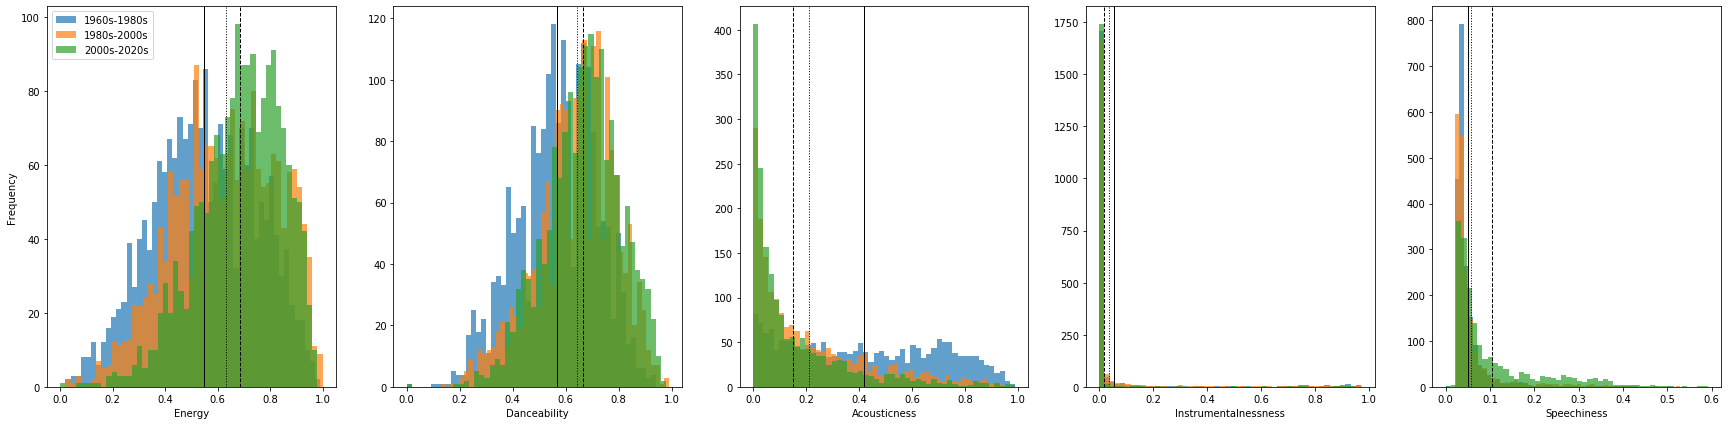

In [4]:
#Plotting 1
import random
import numpy
from matplotlib import pyplot as plt
import statistics

f = plt.figure()
line = ['solid', 'dotted', 'dashed']

colors = ['violet', 'blue', 'green', 'yellow', 'orange', 'red']
f.add_subplot(1,5,1)
i = 0
mean_values_energy = []
for item in dict_of_decade_energy:
    list_energy = []
    for value in dict_of_decade_energy[item]:
        list_energy.append(value)
    
    plt.hist(list_energy, bins =50, alpha=0.7, label=item)
    plt.legend(loc='upper left')
    plt.xlabel("Energy")
    plt.ylabel("Frequency")
    plt.axvline(statistics.mean(list_energy), color='k', linestyle=line[i], linewidth=1)
    mean_values_energy.append(str(item) +': ' + str(round(statistics.mean(list_energy),2)))
    i = i + 1
    
f.add_subplot(1,5,2)
i = 0
mean_values_dance = []
for item in dict_of_decade_danceability:
    list_dance = []
    for value in dict_of_decade_danceability[item]:
        list_dance.append(value)
    
    plt.hist(list_dance, bins =50, alpha=0.7, label=item)
    plt.xlabel("Danceability")
    plt.axvline(statistics.mean(list_dance), color='k', linestyle=line[i], linewidth=1)
    mean_values_dance.append(str(item) +': ' + str(round(statistics.mean(list_dance),2)))
    i = i + 1
    
f.add_subplot(1,5,3)
i = 0
mean_values_acoustic = []
for item in dict_of_decade_acousticness:
    list_acoustic = []
    for value in dict_of_decade_acousticness[item]:
        list_acoustic.append(value)
        
    plt.hist(list_acoustic, bins =50, alpha=0.7, label=item)
    plt.xlabel("Acousticness")
    plt.axvline(statistics.mean(list_acoustic), color='k', linestyle=line[i], linewidth=1)
    mean_values_acoustic.append(str(item) +': ' + str(round(statistics.mean(list_acoustic),2)))
    i = i + 1

f.add_subplot(1,5,4)
i = 0
mean_values_instrument = []
for item in dict_of_decade_instrumentalness:
    list_instrument = []
    for value in dict_of_decade_instrumentalness[item]:
        list_instrument.append(value)
        
    plt.hist(list_instrument, bins =50, alpha=0.7, label=item)
    plt.xlabel("Instrumentalnessness")
    plt.axvline(statistics.mean(list_instrument), color='k', linestyle=line[i], linewidth=1)
    mean_values_instrument.append(str(item) +': ' + str(round(statistics.mean(list_instrument),2)))
    i = i + 1
    
f.add_subplot(1,5,5)
i = 0
mean_values_speech = []
for item in dict_of_decade_speechness:
    list_speech = []
    for value in dict_of_decade_speechness[item]:
        list_speech.append(value)
        
    plt.hist(list_speech, bins =50, alpha=0.7, label=item)
    plt.xlabel("Speechiness")
    plt.axvline(statistics.mean(list_speech), color='k', linestyle=line[i], linewidth=1)
    mean_values_speech.append(str(item) +': ' + str(round(statistics.mean(list_speech),2)))
    i = i + 1
    
f.set_figheight(7)
f.set_figwidth(30)


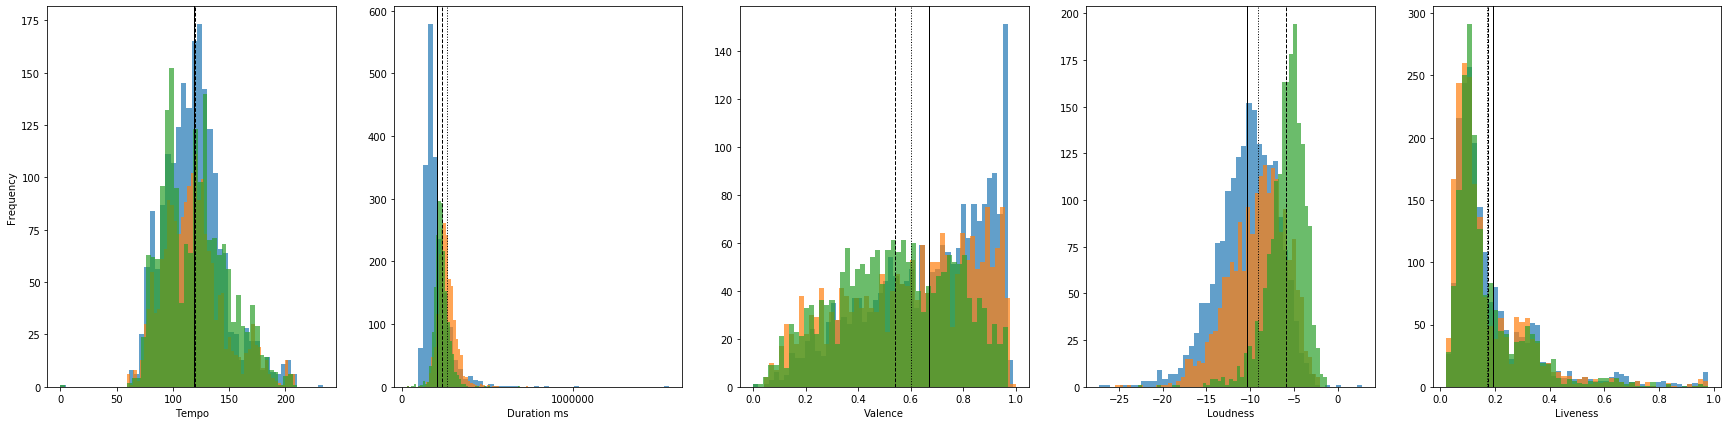

In [5]:
import numpy as np
line = ['solid', 'dotted', 'dashed']

f = plt.figure()
f.add_subplot(1,5,1)
i = 0
mean_values_tempo = []
for item in dict_of_decade_tempo:
    list_tempo = []
    for value in dict_of_decade_tempo[item]:
        list_tempo.append(value)
        
    plt.hist(list_tempo, bins =50, alpha=0.7, label=item)
    plt.xlabel("Tempo")
    plt.ylabel("Frequency")
    plt.axvline(statistics.mean(list_tempo), color='k', linestyle=line[i], linewidth=1)
    mean_values_tempo.append(str(item) +': ' + str(round(statistics.mean(list_tempo),2)))
    i = i + 1
    
f.add_subplot(1,5,2)
i = 0
mean_values_duration = []
for item in dict_of_decade_duration:
    list_duration = []
    for value in dict_of_decade_duration[item]:
        list_duration.append(value)
        
    plt.hist(list_duration, bins =50, alpha=0.7, label=item)
    plt.xlabel("Duration ms")
    plt.xticks(np.arange(0, 1000001, step=1000000)) 
    plt.axvline(statistics.mean(list_duration), color='k', linestyle=line[i], linewidth=1)
    mean_values_duration.append(str(item) +': ' + str(round(statistics.mean(list_duration),2)))
    i = i + 1
    
f.add_subplot(1,5,3)
i = 0
mean_values_valence = []
for item in dict_of_decade_valence:
    list_valence = []
    for value in dict_of_decade_valence[item]:
        list_valence.append(value)
        
    plt.hist(list_valence, bins =50, alpha=0.7, label=item)
    plt.xlabel("Valence")
    plt.axvline(statistics.mean(list_valence), color='k', linestyle=line[i], linewidth=1)
    mean_values_valence.append(str(item) +': ' + str(round(statistics.mean(list_valence),2)))
    i = i + 1
    
f.add_subplot(1,5,4)
i = 0
mean_values_loud = []
for item in dict_of_decade_loud:
    list_loud = []
    for value in dict_of_decade_loud[item]:
        list_loud.append(value)
        
    plt.hist(list_loud, bins =50, alpha=0.7, label=item)
    plt.xlabel("Loudness")
    plt.axvline(statistics.mean(list_loud), color='k', linestyle=line[i], linewidth=1)
    mean_values_loud.append(str(item) +': ' + str(round(statistics.mean(list_loud),2)))
    i = i + 1
    
f.add_subplot(1,5,5)
i = 0
mean_values_live = []
for item in dict_of_decade_live:
    list_live = []
    for value in dict_of_decade_live[item]:
        list_live.append(value)
        
    plt.hist(list_live, bins =50, alpha=0.7, label=item)
    plt.xlabel("Liveness")
    plt.axvline(statistics.mean(list_live), color='k', linestyle=line[i], linewidth=1)
    mean_values_live.append(str(item) +': ' + str(round(statistics.mean(list_live),2)))
    i = i + 1
     
f.set_figheight(7)
f.set_figwidth(30)

In [6]:
#Print mean values
print('Energy Mean:', mean_values_energy)
print('Danceability Mean:', mean_values_dance)
print('Acousticness Mean:', mean_values_acoustic)
print('Instrumentalness Mean:', mean_values_instrument)
print('Speechiness Mean:', mean_values_speech)

print('Tempo Mean:', mean_values_tempo)
print('Duration Mean:', mean_values_duration)
print('Valence Mean:', mean_values_valence)
print('Loudness Mean:', mean_values_loud)
print('Liveness Mean:', mean_values_live)

Energy Mean: ['1960s-1980s: 0.55', '1980s-2000s: 0.63', '2000s-2020s: 0.69']
Danceability Mean: ['1960s-1980s: 0.57', '1980s-2000s: 0.64', '2000s-2020s: 0.66']
Acousticness Mean: ['1960s-1980s: 0.42', '1980s-2000s: 0.21', '2000s-2020s: 0.15']
Instrumentalness Mean: ['1960s-1980s: 0.05', '1980s-2000s: 0.04', '2000s-2020s: 0.02']
Speechiness Mean: ['1960s-1980s: 0.05', '1980s-2000s: 0.06', '2000s-2020s: 0.11']
Tempo Mean: ['1960s-1980s: 119.01', '1980s-2000s: 118.6', '2000s-2020s: 120.08']
Duration Mean: ['1960s-1980s: 202641.79', '1980s-2000s: 261664.55', '2000s-2020s: 232388.92']
Valence Mean: ['1960s-1980s: 0.67', '1980s-2000s: 0.6', '2000s-2020s: 0.54']
Loudness Mean: ['1960s-1980s: -10.31', '1980s-2000s: -9.1', '2000s-2020s: -5.85']
Liveness Mean: ['1960s-1980s: 0.19', '1980s-2000s: 0.17', '2000s-2020s: 0.17']
